# Mask Postprocessing

In this notebook we will refine the masks obtained via image processing techniques. 

## Exploration

First test the processing pipeline with a single image. We start by loading and displaying a sample image.

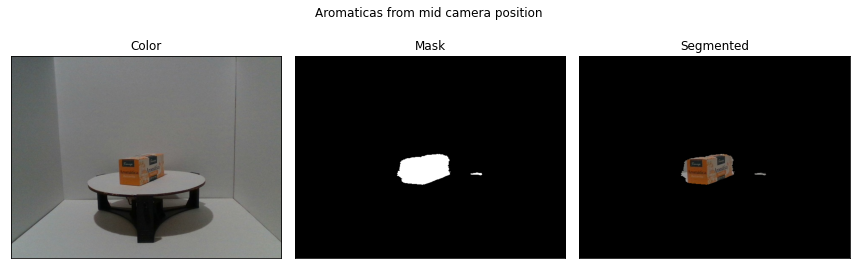

In [7]:
import cv2
import os
import matplotlib.pyplot as plt

#objects = os.listdir('img')
#views = ('front', 'mid', 'high')

obj = 'aromaticas'
view = 'mid'
idx = 37

# obj = 'pimenton'
# view = 'front'
# idx = 0

mask_path = os.path.join('img', obj, f'{view}_mask_{idx}.png')
color_path = os.path.join('img', obj, f'{view}_color_{idx}.jpg')

mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
color = cv2.imread(color_path, cv2.IMREAD_COLOR)
color = cv2.cvtColor(color, cv2.COLOR_BGR2RGB)

masked = cv2.bitwise_and(color, color, mask=mask)

plt.figure(figsize=(12,4))
plt.suptitle(f"{obj.title()} from {view} camera position")
plt.subplot(1,3,1)
plt.imshow(color)
plt.xticks([])
plt.yticks([])
plt.title("Color")
plt.subplot(1,3,2)
plt.title("Mask")
plt.imshow(mask, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.subplot(1,3,3)
plt.title("Segmented")
plt.imshow(masked)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

### Morphological Filter

Here we apply to our binary image and opening followed by a closing

In [8]:
def postproc_mask(obj, view, idx):
    mask_path = os.path.join('img', obj, f'{view}_mask_{idx}.png')
    color_path = os.path.join('img', obj, f'{view}_color_{idx}.jpg')

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    color = cv2.imread(color_path, cv2.IMREAD_COLOR)
    color = cv2.cvtColor(color, cv2.COLOR_BGR2RGB)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))

    opened = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)

    return color, mask, opened, closed

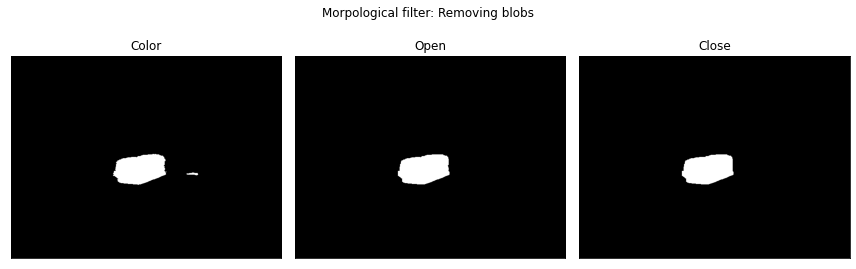

In [9]:
color, mask, opened, closed = postproc_mask(obj, view, idx)

plt.figure(figsize=(12,4))
plt.suptitle("Morpological filter: Removing blobs")
plt.subplot(1,3,1)
plt.title("Color")
plt.imshow(mask, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.subplot(1,3,2)
plt.title("Open")
plt.imshow(opened, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.subplot(1,3,3)
plt.title("Close")
plt.imshow(closed, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

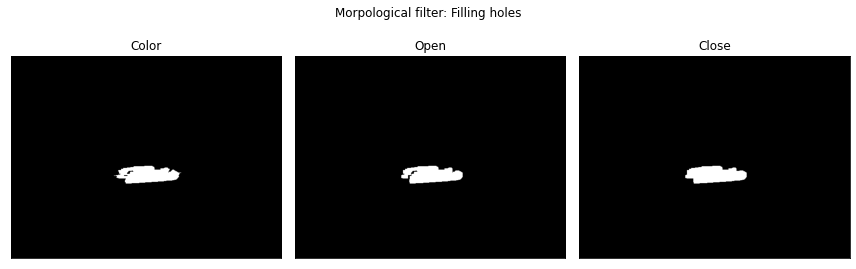

In [10]:
obj, view, idx = 'brownie', 'mid', 162

color, mask, opened, closed = postproc_mask(obj, view, idx)

plt.figure(figsize=(12,4))
plt.suptitle("Morpological filter: Filling holes")
plt.subplot(1,3,1)
plt.title("Color")
plt.imshow(mask, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.subplot(1,3,2)
plt.title("Open")
plt.imshow(opened, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.subplot(1,3,3)
plt.title("Close")
plt.imshow(closed, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

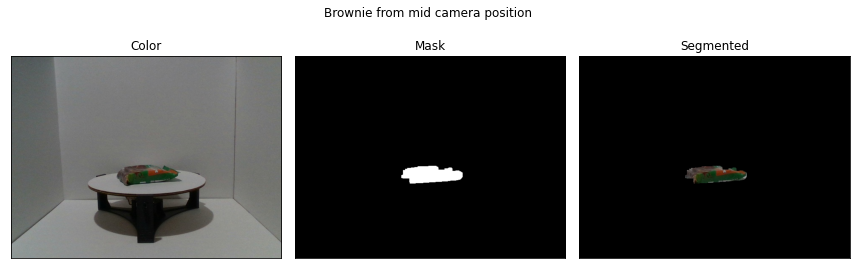

In [11]:
masked = cv2.bitwise_and(color, color, mask=closed)

plt.figure(figsize=(12,4))
plt.suptitle(f"{obj.title()} from {view} camera position")
plt.subplot(1,3,1)
plt.imshow(color)
plt.xticks([])
plt.yticks([])
plt.title("Color")
plt.subplot(1,3,2)
plt.title("Mask")
plt.imshow(closed, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.subplot(1,3,3)
plt.title("Segmented")
plt.imshow(masked)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

In [12]:
cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))

array([[1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

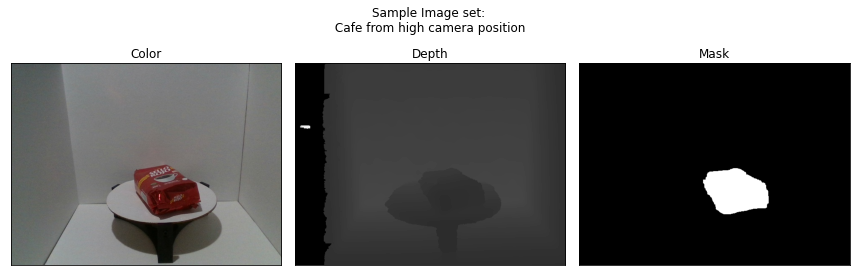

In [16]:
import imageio
from pcd_utils import load_rgbd_image


obj, view, idx = 'cafe', 'high', '10'

color_path = os.path.join('img', obj, f'{view}_color_{idx}.jpg')
depth_path = os.path.join('img', obj, f'{view}_depth_{idx}.png')
mask_path = os.path.join('img', obj, f'{view}_mask_proc_{idx}.png')

color = imageio.imread(color_path)
depth = imageio.imread(depth_path)
mask = imageio.imread(mask_path)

rgbd = load_rgbd_image(color_path, depth_path)

plt.figure(figsize=(12,4))
plt.suptitle(f"Sample Image set:\n {obj.title()} from {view} camera position")
plt.subplot(1,3,1)
plt.title("Color")
plt.imshow(rgbd.color)
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,2)
plt.title("Depth")
plt.imshow(rgbd.depth, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,3)
plt.title("Mask")
plt.imshow(mask, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

## 